In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

melbourne = pd.read_csv('/Users/cptnemo2005/Desktop/SEIR/population_non_worker_75_mel.csv', sep=',',header=None)
pop       = melbourne.values
pop       = np.nan_to_num(pop, copy = True)
pop       = pop.astype(int)

od_matrix = genfromtxt('/Users/cptnemo2005/Desktop/SEIR/OD_Matrix_no_work_75.csv', delimiter=',')
od_matrix = np.reshape(od_matrix, (12,309,309))
od_matrix = np.nan_to_num(od_matrix, copy = True)
od_matrix = od_matrix.astype(int)

#At this point only have 25% for pop and flow, now we scale them up

pop = pop*4
od_matrix = od_matrix*4

for i in range(1,12):
    pop[i,:] = pop[0,:]

to_this_origin   = np.sum(od_matrix,axis = 1)
from_this_origin = np.sum(od_matrix,axis = 2)

to_this_origin

from_this_origin

np.sum(pop,axis = 1)

pop = pop + to_this_origin - from_this_origin

In [30]:
np.sum(pop,axis = 1)

array([4237364, 4237364, 4237364, 4237364, 4237364, 4237364, 4237364,
       4237364, 4237364, 4237364, 4237364, 4237364])

In [33]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
def sir_plot(res):
    plt.plot(res[::12,0], color='r',label='Susceptible')
    plt.plot(res[::12,1], color='g',label='Infectous')
    plt.plot(res[::12,2], color='b',label='Recovered')
    plt.plot(res[::12,3], color='y',label='Hospital')     
    plt.legend()

from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')
r = od_matrix.shape[0]
n = pop.shape[1]
N = 4237364.0
import random

random.seed(30)


OD_id = [p for p in range (0,309)]
# Take 20 random location
initialInd = random.sample(OD_id, 20)

initial = np.zeros(n)
#Each location has 10 people infected at the beginning
initial[initialInd] = 15

model = Param(R0 = 2.4, DI = 5.2*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run virus-sim.py

alpha = np.ones(od_matrix.shape)
iterations = 3000
res = {}
inf = 10
res['baseline'] = sir(model,pop,od_matrix,alpha,iterations,inf)

/Users/cptnemo2005/Desktop/SEIR/virus-sim.py:56: RuntimeWarning: invalid value encountered in true_divide
  res[0,:] = [Svec.sum(), Ivec.sum(), Rvec.sum(), 0]


Max number of hospitalised people:  197575 
 Day with max hospitalised people:  58


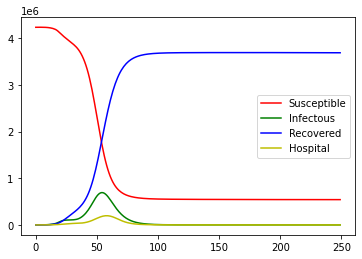

In [34]:
print(
"Max number of hospitalised people: ", int(res["baseline"][0][:,3].max()),
"\n",
"Day with max hospitalised people: ", int(res["baseline"][0][:,3].argmax()/12)
)
# plot result
sir_plot(res["baseline"][0])

In [28]:
newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)

print(np.sum(newI))

(3000, 309)
3700816.989909221
